# Data pre-processing

Here we pre-process and clean the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv('../csv/NOW_dataframe.csv',index_col=0)
pd.set_option('max_columns',100)

In [2]:
df.head()

,LIDNUM,NAME,LATSTR,LONGSTR,LAT,LONG,MAX_AGE,BFA_MAX,BFA_MAX_ABS,FRAC_MAX,MIN_AGE,BFA_MIN,BFA_MIN_ABS,FRAC_MIN,CHRON,COUNTRY,STATE,COUNTY,APNUMSPM,GENERAL,LOC_SYNONYMS,MEAN_HYPSODONTY,ESTIMATE_PRECIP,ESTIMATE_TEMP,ESTIMATE_NPP,PERS_WOODY_COVER,PERS_POLLEN_AP,PERS_POLLEN_NAP,PERS_POLLEN_OTHER,SIDNUM,ORDER,FAMILY,GENUS,SPECIES,SUBCLASSORSUPERORDER,SUBORDERORSUPERFAMILY,SUBFAMILY,UNIQUE,TAXON_STATUS,ID_STATUS,ADD_INFO,SOURCE_NAME,LS_MICROWEAR,LS_MESOWEAR,LS_MESOWEAR_SCORE,LS_MW_OR_HIGH,LS_MW_OR_LOW,LS_MW_CS_SHARP,LS_MW_CS_ROUND,LS_MW_CS_BLUNT,SVLENGTH,BODYMASS,SXDIMSZE,SXDIMDIS,TSHM,TCRWNHT,HORIZODONTY,CROWNTYP,CUSP_SHAPE,CUSP_COUNT_BUCCAL,CUSP_COUNT_LINGUAL,LOPH_COUNT_LON,LOPH_COUNT_TRS,FCT_AL,FCT_OL,FCT_SF,FCT_OT,FCT_CM,MICROWEAR,MESOWEAR,MESOWEAR_SCORE,MW_OR_HIGH,MW_OR_LOW,MW_CS_SHARP,MW_CS_ROUND,MW_CS_BLUNT,DIET_1,DIET_2,DIET_3,LOCOMO1,LOCOMO2,LOCOMO3,SPCOMMENT,SYNONYMS
0,21390.0,Aarau,47 23 0 N,8 3 0 E,47.383,8.050000,14.2000,mn6,\N,\N,12.8500,mn6,\N,\N,\N,Switzerland,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,24548.0,Artiodactyla,Cainotheriidae,Microtherium,renggeri,Eutheria,\N,\N,-,taxonomic validity uncertain,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,10cm-1m,\N,\N,\N,\N,\N,\N,S2300,S,2,3,0,0,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,27232.0,Aba_zawei,33 15 00 N,102 25 00 E,33.250,102.416667,0.0295,\N,C14,\N,0.0235,\N,C14,\N,\N,China,Sichuan,Aba,\N,n,\N,3.00,\N,\N,\N,\N,\N,\N,\N,21848.0,Perissodactyla,Equidae,Equus,indet.,Eutheria,\N,\N,-,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,plo,hyp,bra,L2320,L,2,3,2,0,0,1,0,1,1,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,graze,te,surficial,cursorial,\N,\N
2,27232.0,Aba_zawei,33 15 00 N,102 25 00 E,33.250,102.416667,0.0295,\N,C14,\N,0.0235,\N,C14,\N,\N,China,Sichuan,Aba,\N,n,\N,3.00,\N,\N,\N,\N,\N,\N,\N,25034.0,Perissodactyla,Rhinocerotidae,Coelodonta,antiquitatis,Eutheria,\N,\N,-,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,2m-5m,1837313,\N,\N,plo,hyp,bra,L2222,L,2,2,2,2,0,1,0,1,1,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,graze,te,surficial,gen_quad,\N,Rhinoceros tichorhinus
3,27232.0,Aba_zawei,33 15 00 N,102 25 00 E,33.250,102.416667,0.0295,\N,C14,\N,0.0235,\N,C14,\N,\N,China,Sichuan,Aba,\N,n,\N,3.00,\N,\N,\N,\N,\N,\N,\N,25173.0,Artiodactyla,Bovidae,Bos,primigenius,Eutheria,\N,\N,-,\N,\N,Bos? primigenius,\N,\N,\N,\N,\N,\N,\N,\N,\N,2m-5m,1059726,\N,\N,sel,hyp,bra,L2220,L,2,2,2,0,0,1,1,0,1,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,\N,te,\N,\N,\N,\N
4,27232.0,Aba_zawei,33 15 00 N,102 25 00 E,33.250,102.416667,0.0295,\N,C14,\N,0.0235,\N,C14,\N,\N,China,Sichuan,Aba,\N,n,\N,3.00,\N,\N,\N,\N,\N,\N,\N,25283.0,Artiodactyla,Bovidae,Bos,indet.,Eutheria,\N,\N,-,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,2m-5m,\N,\N,\N,sel,hyp,\N,L2220,L,2,2,2,0,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,\N,te,surficial,\N,\N,\N


In [3]:
print('Number of rows in df: ' + str(df.shape[0]))

Number of rows in df: 68502


In [4]:
# remove rows with LAT=LONG=0
df = df.drop(df[(df['LONG']==0) & (df['LAT']==0)].index)
print('Number of rows in df: ' + str(df.shape[0]))

Number of rows in df: 68496


In [5]:
# drop rows where species is sp.
df=df.loc[df['SPECIES']!='sp.']
print('Number of rows in df: ' + str(df.shape[0]))

# drop rows where species is indet.
df=df.loc[df['SPECIES']!='indet.']
print('Number of rows in df: ' + str(df.shape[0]))

Number of rows in df: 67118
Number of rows in df: 48368


In [6]:
# drop rows with only nan entries
df = df.drop(df.loc[df.isnull().all(axis=1)].index)
print('Number of rows in df: ' + str(df.shape[0]))

Number of rows in df: 48367


In [7]:
# are there unassigned ages?
print(df[df['MIN_AGE'].isnull()].shape[0])
print(df[df['MAX_AGE'].isnull()].shape[0])

0
0


There are a number of occurrences that do not have a uniquely defined MN time unit. We assign each occurrence a time unit based on the average of 'MIN_AGE' and 'MAX_AGE'.

In [8]:
# BFA_MAX and BFA_MIN do not always agree
df.loc[df['BFA_MAX']!=df['BFA_MIN']].shape[0]

6116

In [9]:
# there are a lot of different time labels
df['BFA_MIN'].unique()

array(['mn6', '\\N', 'mn15', 'mn12', 'c5an.1n', 'c5an.2n', 'c5r.3r',
       'c5r.2n', 'c5r.2r', 'mn2', 'mn13', 'mn9', 'huayquerian', 'mn4',
       'mn5', 'thanetian', 'mn17', 'mn10', 'piacenzian',
       'oldstylepleistocene', 'mn3', 'mp19', 'gelasian', 'mn16',
       'calabrian', 'middlepleistocene', 'pliocene', 'ruscinian', 'mn11',
       'miocene', 'mn7-8', 'bartonian', 'villanyian', 'chattian', 'mn14',
       'messinian', 'burdigalian', 'zanclian', 'tortonian', 'oligocene',
       'serravallian', 'mn1', 'ois12', 'mousterian', 'nmu8', 'holocene',
       'maeotian', 'pannonian', 'quaternary', 'biharian', 'sarmatian',
       'chokrak', 'weichselian', 'aragonian', 'c2ar', 'ois8', 'ois11',
       'ois6', 'c4ar.2r', 'c4ar.3r', 'c5n.2n', 'eocene', 'c5aan',
       'turolian', 'mp27', 'pleistocene', 'mp30', 'mp18', 'ypresian',
       'c3ar', 'c3r', 'baodean', 'langhian', 'c1r.2r', 'mp20',
       'hemingfordian', 'zanclean', 'barstovian', 'gaozhuangian',
       'c1r.1r', 'nmu9', 'ois9', 'ois

In [10]:
# assign time units based on average time
# create a new column: 'TIMEUNIT'

df['MEAN_AGE'] = df[['MIN_AGE','MAX_AGE']].mean(axis=1)
timeBoundaries = [23,21.7,19.5,17.2,16.4,14.2,12.85,11.2,9.9,8.9,7.6,7.1,5.3,5,3.55,2.5,1.9,0.85,0.01]
timeUnits = ['MN1','MN2','MN3','MN4','MN5','MN6','MN7-8','MN9','MN10','MN11','MN12','MN13','MN14','MN15','MN16','MN17','MQ18','MQ19']
count = 0
for ix in range(0,len(timeUnits)):
    occurrencesWithinTimeUnit = df[(timeBoundaries[ix] > df['MEAN_AGE']) & (df['MEAN_AGE'] >= timeBoundaries[ix+1])]
    df.loc[occurrencesWithinTimeUnit.index,'TIMEUNIT'] = timeUnits[ix]

In [11]:
timeBoundariesLength = []
for ix in np.arange(0,len(timeBoundaries)-1):
    timeBoundariesLength.append(timeBoundaries[ix]-timeBoundaries[ix+1])
print('Mean time unit length: ' + str(np.mean(timeBoundariesLength)) + ' Mya.')

Mean time unit length: 1.2772222222222223 Mya.


In [12]:
# how many rows do not have a timeunit assigned?
df['TIMEUNIT'].isnull().sum()

8463

In [13]:
numberOldOccurrences = df[df['MEAN_AGE']>=timeBoundaries[0]].shape[0]
numberRecentOccurrences = df[df['MEAN_AGE']<timeBoundaries[-1]].shape[0]
print('Number of occurrences where timeunit is older than MN: ' + str(numberOldOccurrences))
print('Number of occurrences where timeunit is more recent than MN: ' + str(numberRecentOccurrences))
print('Total: ' + str(numberOldOccurrences+numberRecentOccurrences))

Number of occurrences where timeunit is older than MN: 8322
Number of occurrences where timeunit is more recent than MN: 141
Total: 8463


In [14]:
df.loc[df['MEAN_AGE']>=timeBoundaries[0],'TIMEUNIT'] = 'old'
df.loc[df['MEAN_AGE']<timeBoundaries[-1],'TIMEUNIT'] = 'recent'

# how many rows do not have a timeunit assigned?
df['TIMEUNIT'].isnull().sum()

0

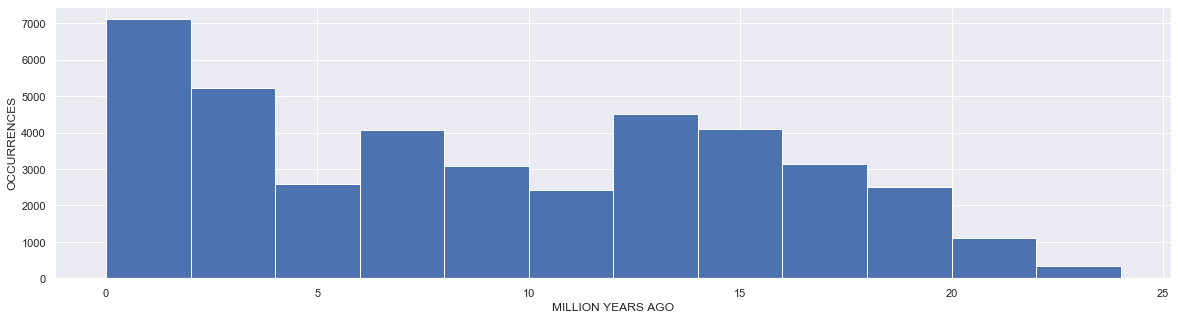

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
plt.hist(df['MEAN_AGE'],np.arange(0,25,2))
plt.xlabel('MILLION YEARS AGO')
plt.ylabel('OCCURRENCES')
plt.show()

In [16]:
display(df.loc[(df['NAME'] == 'Samos Main Bone Beds'), 'TIMEUNIT'].unique())
display(df.loc[(df['NAME'] == 'Can Llobateres I'), 'TIMEUNIT'].unique())

array(['MN12'], dtype=object)

array(['MN10'], dtype=object)

In [17]:
# Change Samos to MN12 (used to be wrong, now fixed)
# ix = (df[df['NAME'] == 'Samos Main Bone Beds']).index
# df.loc[ix, 'TIMEUNIT'] = 'MN12'

# Change Can Llobateres I to MN9 based on expert domain knowledge
ix = (df[df['NAME'] == 'Can Llobateres I']).index
df.loc[ix, 'TIMEUNIT'] = 'MN9'

Next we identify all unique combinations of genus and species, i.e., we assign a unique ID number for each species. Note that the variable 'SIDNUM' is close to this, but it gives a separate label for some occurrences that we here are simply going to group into one species (e.g. occurrences that have special info under column 'UNIQUE').

In [18]:
# identify all unique GENUS-SPECIES combinations
# i.e. assign a unique id-number to each species

df['ID'] = np.nan
count = 0
for ix in df.index:
    if np.isnan(df.loc[ix,'ID']):
        df.loc[ (df['GENUS']==df.loc[ix,'GENUS']) & (df['SPECIES']==df.loc[ix,'SPECIES']) , 'ID'] = count
        count += 1

df.head()

,LIDNUM,NAME,LATSTR,LONGSTR,LAT,LONG,MAX_AGE,BFA_MAX,BFA_MAX_ABS,FRAC_MAX,MIN_AGE,BFA_MIN,BFA_MIN_ABS,FRAC_MIN,CHRON,COUNTRY,STATE,COUNTY,APNUMSPM,GENERAL,LOC_SYNONYMS,MEAN_HYPSODONTY,ESTIMATE_PRECIP,ESTIMATE_TEMP,ESTIMATE_NPP,PERS_WOODY_COVER,PERS_POLLEN_AP,PERS_POLLEN_NAP,PERS_POLLEN_OTHER,SIDNUM,ORDER,FAMILY,GENUS,SPECIES,SUBCLASSORSUPERORDER,SUBORDERORSUPERFAMILY,SUBFAMILY,UNIQUE,TAXON_STATUS,ID_STATUS,ADD_INFO,SOURCE_NAME,LS_MICROWEAR,LS_MESOWEAR,LS_MESOWEAR_SCORE,LS_MW_OR_HIGH,LS_MW_OR_LOW,LS_MW_CS_SHARP,LS_MW_CS_ROUND,LS_MW_CS_BLUNT,SVLENGTH,BODYMASS,SXDIMSZE,SXDIMDIS,TSHM,TCRWNHT,HORIZODONTY,CROWNTYP,CUSP_SHAPE,CUSP_COUNT_BUCCAL,CUSP_COUNT_LINGUAL,LOPH_COUNT_LON,LOPH_COUNT_TRS,FCT_AL,FCT_OL,FCT_SF,FCT_OT,FCT_CM,MICROWEAR,MESOWEAR,MESOWEAR_SCORE,MW_OR_HIGH,MW_OR_LOW,MW_CS_SHARP,MW_CS_ROUND,MW_CS_BLUNT,DIET_1,DIET_2,DIET_3,LOCOMO1,LOCOMO2,LOCOMO3,SPCOMMENT,SYNONYMS,MEAN_AGE,TIMEUNIT,ID
0,21390.0,Aarau,47 23 0 N,8 3 0 E,47.383000,8.050000,14.2000,mn6,\N,\N,12.8500,mn6,\N,\N,\N,Switzerland,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,24548.0,Artiodactyla,Cainotheriidae,Microtherium,renggeri,Eutheria,\N,\N,-,taxonomic validity uncertain,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,10cm-1m,\N,\N,\N,\N,\N,\N,S2300,S,2,3,0,0,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,13.5250,MN6,0.0
2,27232.0,Aba_zawei,33 15 00 N,102 25 00 E,33.250000,102.416667,0.0295,\N,C14,\N,0.0235,\N,C14,\N,\N,China,Sichuan,Aba,\N,n,\N,3.00,\N,\N,\N,\N,\N,\N,\N,25034.0,Perissodactyla,Rhinocerotidae,Coelodonta,antiquitatis,Eutheria,\N,\N,-,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,2m-5m,1837313,\N,\N,plo,hyp,bra,L2222,L,2,2,2,2,0,1,0,1,1,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,graze,te,surficial,gen_quad,\N,Rhinoceros tichorhinus,0.0265,MQ19,1.0
3,27232.0,Aba_zawei,33 15 00 N,102 25 00 E,33.250000,102.416667,0.0295,\N,C14,\N,0.0235,\N,C14,\N,\N,China,Sichuan,Aba,\N,n,\N,3.00,\N,\N,\N,\N,\N,\N,\N,25173.0,Artiodactyla,Bovidae,Bos,primigenius,Eutheria,\N,\N,-,\N,\N,Bos? primigenius,\N,\N,\N,\N,\N,\N,\N,\N,\N,2m-5m,1059726,\N,\N,sel,hyp,bra,L2220,L,2,2,2,0,0,1,1,0,1,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,\N,te,\N,\N,\N,\N,0.0265,MQ19,2.0
5,27232.0,Aba_zawei,33 15 00 N,102 25 00 E,33.250000,102.416667,0.0295,\N,C14,\N,0.0235,\N,C14,\N,\N,China,Sichuan,Aba,\N,n,\N,3.00,\N,\N,\N,\N,\N,\N,\N,29944.0,Artiodactyla,Bovidae,Gazella,prjewalskyi,Eutheria,\N,\N,-,\N,\N,Gazella cf. prjewalskyi,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,sel,\N,\N,L2220,L,2,2,2,0,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,\N,te,\N,\N,\N,\N,0.0265,MQ19,3.0
7,27955.0,Abengibre,39 12 35 N,1 32 39 W,39.209991,-1.544182,5.0000,mn15,\N,\N,3.5500,mn15,\N,\N,Late Ruscinian,Spain,\N,Province of Albacete,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,21244.0,Rodentia,Muridae,Stephanomys,donnezani,Eutheria,\N,Murinae,-,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,\N,\N,\N,\N,\N,\N,4.2750,MN15,4.0


In [19]:
print(df['SIDNUM'].nunique())
print(df['ID'].nunique())

9983
9692


In [20]:
# for each species ID, collect all corresponding SIDNUM
sidnum_dict = {species_id: np.array(df.loc[df['ID']==species_id, 'SIDNUM'].unique()) for species_id in df['ID'].unique()}

In [21]:
# for a given dictionary, find key-value pairs where the value is an array containing multiple rows
def dict_multivalues(dictionary):
    dict_multiples = {}
    for key in dictionary.keys():
        if dictionary[key].shape[0]>1:
            dict_multiples[key] = dictionary[key]
    return dict_multiples

In [22]:
# some IDs correspond to multiple SIDNUM
sidnum_dict_multiID = dict_multivalues(sidnum_dict)
sidnum_dict_multiID.keys()

dict_keys([10.0, 17.0, 20.0, 42.0, 43.0, 45.0, 46.0, 47.0, 50.0, 92.0, 93.0, 112.0, 122.0, 124.0, 138.0, 170.0, 181.0, 182.0, 197.0, 200.0, 202.0, 217.0, 224.0, 243.0, 247.0, 248.0, 264.0, 270.0, 274.0, 287.0, 291.0, 294.0, 295.0, 302.0, 338.0, 342.0, 366.0, 396.0, 405.0, 414.0, 436.0, 438.0, 440.0, 447.0, 466.0, 468.0, 500.0, 501.0, 502.0, 503.0, 511.0, 524.0, 553.0, 557.0, 560.0, 569.0, 616.0, 635.0, 703.0, 708.0, 749.0, 758.0, 762.0, 763.0, 766.0, 767.0, 769.0, 775.0, 776.0, 791.0, 795.0, 796.0, 800.0, 923.0, 932.0, 943.0, 961.0, 974.0, 975.0, 979.0, 998.0, 1003.0, 1008.0, 1052.0, 1067.0, 1079.0, 1091.0, 1094.0, 1101.0, 1108.0, 1128.0, 1135.0, 1138.0, 1165.0, 1170.0, 1174.0, 1181.0, 1186.0, 1209.0, 1210.0, 1211.0, 1215.0, 1216.0, 1222.0, 1239.0, 1247.0, 1276.0, 1279.0, 1288.0, 1295.0, 1296.0, 1384.0, 1405.0, 1411.0, 1424.0, 1435.0, 1436.0, 1446.0, 1452.0, 1453.0, 1456.0, 1457.0, 1501.0, 1508.0, 1509.0, 1521.0, 1536.0, 1549.0, 1574.0, 1575.0, 1586.0, 1588.0, 1599.0, 1621.0, 1660.0, 1

In [23]:
display(sidnum_dict_multiID[10])
display(df.loc[df['ID']==10])

array([20673., 34318., 31100.])

,LIDNUM,NAME,LATSTR,LONGSTR,LAT,LONG,MAX_AGE,BFA_MAX,BFA_MAX_ABS,FRAC_MAX,MIN_AGE,BFA_MIN,BFA_MIN_ABS,FRAC_MIN,CHRON,COUNTRY,STATE,COUNTY,APNUMSPM,GENERAL,LOC_SYNONYMS,MEAN_HYPSODONTY,ESTIMATE_PRECIP,ESTIMATE_TEMP,ESTIMATE_NPP,PERS_WOODY_COVER,PERS_POLLEN_AP,PERS_POLLEN_NAP,PERS_POLLEN_OTHER,SIDNUM,ORDER,FAMILY,GENUS,SPECIES,SUBCLASSORSUPERORDER,SUBORDERORSUPERFAMILY,SUBFAMILY,UNIQUE,TAXON_STATUS,ID_STATUS,ADD_INFO,SOURCE_NAME,LS_MICROWEAR,LS_MESOWEAR,LS_MESOWEAR_SCORE,LS_MW_OR_HIGH,LS_MW_OR_LOW,LS_MW_CS_SHARP,LS_MW_CS_ROUND,LS_MW_CS_BLUNT,SVLENGTH,BODYMASS,SXDIMSZE,SXDIMDIS,TSHM,TCRWNHT,HORIZODONTY,CROWNTYP,CUSP_SHAPE,CUSP_COUNT_BUCCAL,CUSP_COUNT_LINGUAL,LOPH_COUNT_LON,LOPH_COUNT_TRS,FCT_AL,FCT_OL,FCT_SF,FCT_OT,FCT_CM,MICROWEAR,MESOWEAR,MESOWEAR_SCORE,MW_OR_HIGH,MW_OR_LOW,MW_CS_SHARP,MW_CS_ROUND,MW_CS_BLUNT,DIET_1,DIET_2,DIET_3,LOCOMO1,LOCOMO2,LOCOMO3,SPCOMMENT,SYNONYMS,MEAN_AGE,TIMEUNIT,ID
14,28578.0,Abocador de Can Mata / C1-A4,41 31 57 N,1 47 16 E,41.532600,1.788000,12.174,c5an.1n,\N,\N,12.049,c5an.1n,\N,\N,MN 7+8,Spain,Catalonia,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,20673.0,Rodentia,Muridae,Megacricetodon,minor,Eutheria,\N,Megacricetodontinae,-,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,11,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,\N,\N,\N,\N,\N,\N,12.1115,MN7-8,10.0
32,28580.0,Abocador de Can Mata / C1-E9,41 31 57 N,1 47 20 E,41.532600,1.788900,12.474,c5an.2n,\N,\N,12.272,c5an.2n,\N,\N,MN 7+8,Spain,Catalonia,\N,\N,\N,ACM/C1-E9,\N,\N,\N,\N,\N,\N,\N,\N,20673.0,Rodentia,Muridae,Megacricetodon,minor,Eutheria,\N,Megacricetodontinae,-,\N,\N,cf.,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,11,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,\N,\N,\N,\N,\N,\N,12.3730,MN7-8,10.0
38,28581.0,Abocador de Can Mata / C3-A6,41 31 57 N,1 47 20 E,41.532600,1.788900,12.049,c5r.3r,\N,\N,11.657,c5r.3r,\N,\N,MN 7+8,Spain,Catalonia,\N,\N,\N,ACM/C3-A6,\N,\N,\N,\N,\N,\N,\N,\N,20673.0,Rodentia,Muridae,Megacricetodon,minor,Eutheria,\N,Megacricetodontinae,-,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,11,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,\N,\N,\N,\N,\N,\N,11.8530,MN7-8,10.0
50,28582.0,Abocador de Can Mata / C4-A1,41 31 57 N,1 47 20 E,41.532600,1.788900,12.049,c5r.3r,\N,\N,11.657,c5r.3r,\N,\N,MN 7+8,Spain,Catalonia,\N,\N,\N,ACM/C4-A1,\N,\N,\N,\N,\N,\N,\N,\N,20673.0,Rodentia,Muridae,Megacricetodon,minor,Eutheria,\N,Megacricetodontinae,-,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,11,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,\N,\N,\N,\N,\N,\N,11.8530,MN7-8,10.0
70,28583.0,Abocador de Can Mata / C5-D1,41 31 57 N,1 47 20 E,41.532600,1.788900,11.657,c5r.2n,\N,\N,11.592,c5r.2n,\N,\N,MN 7+8,Spain,Catalonia,\N,\N,\N,ACM/C5-D1,\N,\N,\N,\N,\N,\N,\N,\N,20673.0,Rodentia,Muridae,Megacricetodon,minor,Eutheria,\N,Megacricetodontinae,-,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,11,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,\N,\N,\N,\N,\N,\N,11.6245,MN7-8,10.0
113,28587.0,Abocador de Can Mata / C9-A1,41 31 57 N,1 47 20 E,41.532600,1.788900,12.474,c5an.2n,\N,\N,12.272,c5an.2n,\N,\N,MN 6,Spain,Catalonia,\N,\N,\N,ACM/C9-A1,\N,\N,\N,\N,\N,\N,\N,\N,20673.0,Rodentia,Muridae,Megacricetodon,minor,Eutheria,\N,Megacricetodontinae,-,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,11,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,\N,\N,\N,\N,\N,\N,12.3730,MN7-8,10.0
269,20199.0,Affalterbach,48 34 0 N,11 31 59 E,48.566700,11.533300,16.400,mn5,\N,\N,14.200,mn5,\N,\N,\N,Germany,Bavaria,\N,10,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,20673.0,Rodentia,Muridae,Megacricetodon,minor,Eutheria,\N,Megacricetodontinae,-,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,11,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,p,herbivore,\N,\N,\N,\N,\N,\N,15.3000,MN5,10.0
962,24721.0,Alcocer 2,41 9 24 N,1 25 12 W,41.156800,-1.420200,12.850,mn7-8,\N,\N,11.200,mn7-8,\N,\N,Upper Aragonian,Spain,Prov

LIDNUM gives a unique identifier for each combination of LAT, LONG and TIMEUNIT

In [24]:
# create a dictionary showing for each lidnum a list of unique coordinates [LAT,LONG,TIMEUNIT]
lidnum_coordinates = {}
for lidnum in df['LIDNUM'].unique():
    lidnum_list = []
    lidnum_df = df.loc[df['LIDNUM']==lidnum,['LAT','LONG','TIMEUNIT']]
    for row in lidnum_df.index:
        lidnum_list.append(tuple(lidnum_df.loc[row]))
    lidnum_coordinates[lidnum] = pd.unique(lidnum_list)

In [25]:
# all LIDNUM correspond to a unique set of coordinates (LAT,LONG, TIMEUNIT)
lidnum_dict_multiID = dict_multivalues(lidnum_coordinates)
lidnum_dict_multiID.keys()

dict_keys([])

There are some localities (LIDNUM) that contain multiple occurrences of the same species (ID). We clean multiple occurrences away so that each locality contains each species occurring there only once.

In [26]:
# check whether for each LIDNUM the corresponding list of species only has unique IDs
def localityTestLIDNUMandID(df):
    localityTest = pd.DataFrame()
    for ix in df['LIDNUM'].unique():
        locality = df.loc[df['LIDNUM']==ix]
        localityTest.loc[ix,'occurrences'] = locality.shape[0] # how many occurrences in a locality
        localityTest.loc[ix,'species'] = len(locality['ID'].unique()) # how many unique species        
    print('The number of localities that include multiple instances of the same species:')
    print( sum(localityTest['occurrences'] != localityTest['species']) )
    return localityTest

In [27]:
localityTest = localityTestLIDNUMandID(df)

The number of localities that include multiple instances of the same species:
38


In [28]:
# remove duplicate occurrences from localities
localitiesWithDuplicates_index = localityTest[localityTest['occurrences'] != localityTest['species']].index
for ix in localitiesWithDuplicates_index:
    locality = df.loc[df['LIDNUM']==ix]
    id_set = set()
    for index in locality.index:
        if locality.loc[index,'ID'] not in id_set:
            id_set.add(locality.loc[index,'ID'])
        else:
            df = df.drop(index)

localityTestLIDNUMandID(df);

The number of localities that include multiple instances of the same species:
0


In [29]:
print('Number of data points: ' + str(df.shape[0]))
print('Number of unique species: ' + str(len(df['ID'].unique())))
print('Number of unique localities: ' + str(len(df['LIDNUM'].unique())))

Number of data points: 48318
Number of unique species: 9692
Number of unique localities: 5360


In [30]:
print('Number of data points: ' + str(df.loc[(df['LAT']>35) & (df['LONG']>-25) & (df['LONG']<40)].shape[0]))
print('Number of unique species: ' + str(len(df.loc[(df['LAT']>35) & (df['LONG']>-25) & (df['LONG']<40), 'ID'].unique())))
print('Number of unique localities: ' + str(len(df.loc[(df['LAT']>35) & (df['LONG']>-25) & (df['LONG']<40), 'LIDNUM'].unique())))

Number of data points: 22939
Number of unique species: 2937
Number of unique localities: 2822


Next, we clean up some of the tooth data for later environmental analysis.

In [30]:
df['TCRWNHT'].unique()

array(['\\N', 'hyp', 'bra', 'mes', 'hys'], dtype=object)

In [31]:
df['HYP'] = np.nan
df.loc[df['TCRWNHT']=='bra','HYP'] = 1
df.loc[df['TCRWNHT']=='mes','HYP'] = 2
df.loc[df['TCRWNHT']=='hyp','HYP'] = 3
df.loc[df['TCRWNHT']=='hys','HYP'] = 3 # both 'hyp' and 'hys' are mapped to value 3

In [32]:
df['LOPH_COUNT_LON'].unique()

array(['0', '2', '\\N', '1', '3'], dtype=object)

In [33]:
df.loc[df['LOPH_COUNT_LON']=='0','LOP'] = 0
df.loc[df['LOPH_COUNT_LON']=='1','LOP'] = 1
df.loc[df['LOPH_COUNT_LON']=='2','LOP'] = 2
df.loc[df['LOPH_COUNT_LON']=='3','LOP'] = 2 # both '2' and '3' are mapped to 2
df.loc[df['LOPH_COUNT_LON']=='\\N','LOP'] = np.nan

In [34]:
# save dataframe
df.to_csv('../csv/NOW_dataframe_cleaned.csv')